In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Preberi celotno Excel datoteko
file_path = r"C:\COMP - Jaka Rober\Programi\Validacija kapacitet - ELES\AMICA DACF reporti\GlobalOverview_1_01012025_18-37-20.xls"

xls = pd.ExcelFile(file_path)

# Shrani vsak list v svoj DataFrame
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}
# dfs = {sheet: df.iloc[19:, 1:] for sheet, df in dfs.items()}
dfs = {sheet: df[df['Unnamed: 1'] != 'AMICA Reporting'] for sheet, df in dfs.items()}

# Dostop do posameznih DataFrame-ov
df1 = dfs[xls.sheet_names[0]]
df2 = dfs[xls.sheet_names[1]]
df3 = dfs[xls.sheet_names[2]]
df4 = dfs[xls.sheet_names[3]]
df5 = dfs[xls.sheet_names[4]]

# LF
df1.columns = df1.iloc[18, :]
df1 = df1.iloc[19:, 1:]
# CA
df2.columns = df2.iloc[20, :]
df2 = df2.drop(df2.columns[[1,3,4]], axis=1)
df2 = df2.iloc[21:, :]
df2 = df2.dropna(how='all')
# Tap position
df3.columns = df3.iloc[18, :]
df3 = df3.iloc[19:20, 2:]
# Tie-Line flkows
df5.columns = df5.iloc[18, :]
df5 = df5.iloc[19:34, 1:]
df5 = df5[df5.iloc[:, 1].notna()]
df5 = df5.dropna(axis=1, how='all')

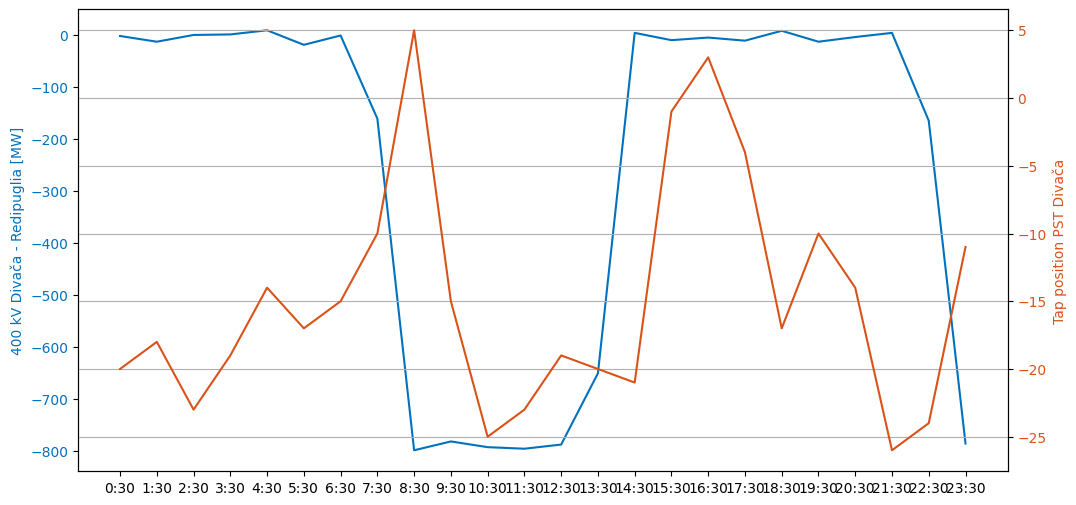

In [109]:
# Prikaz zadnjih 24 stolpcev iz df3
tap_pos = df3.iloc[:, -24:]

# Prikaz zadnje vrstice iz df5
di_red_400 = df5.iloc[-1:, -24:]
di_red_400.apply(pd.to_numeric, errors='coerce')
di_red_400 = di_red_400.apply(lambda x: x.astype(int))

# Ustvari figuro in dva podgrafika
fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.plot(di_red_400.columns[-24:], di_red_400.iloc[:, -24:].values.T, label="400 kV Divača - Redipuglia", color="#0072BD", zorder=2)
ax1.set_ylabel('400 kV Divača - Redipuglia [MW]', color='#0072BD')
ax1.tick_params(axis='y', labelcolor='#0072BD')

ax2 = ax1.twinx()
# plt.plot(x=tap_pos.columns[-24:], y=tap_pos.iloc[:, -24:].values.T.flatten(), ax=ax2, color="#D95319", zorder=1)
ax2.plot(tap_pos.columns[-24:], tap_pos.iloc[:, -24:].values.T, label="n", color="#D95319")  # Za zadnjih 24 stolpcev
ax2.set_xlabel('Columns')
ax2.set_ylabel('Tap position PST Divača', color='#D95319')
ax2.tick_params(axis='y', labelcolor='#D95319')

# Prikaz grafa
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [72]:
tap_pos

18,0:30,1:30,2:30,3:30,4:30,5:30,6:30,7:30,8:30,9:30,...,14:30,15:30,16:30,17:30,18:30,19:30,20:30,21:30,22:30,23:30
19,-20,-18,-23,-19,-14,-17,-15,-10,5,-15,...,-21,-1,3,-4,-17,-10,-14,-26,-24,-11


In [81]:
di_red_400['0:30'].dtype
di_red_400

18,0:30,1:30,2:30,3:30,4:30,5:30,6:30,7:30,8:30,9:30,...,14:30,15:30,16:30,17:30,18:30,19:30,20:30,21:30,22:30,23:30
33,-2,-13,0,1,9,-19,-1,-161,-799,-782,...,4,-10,-5,-11,8,-13,-4,4,-165,-786


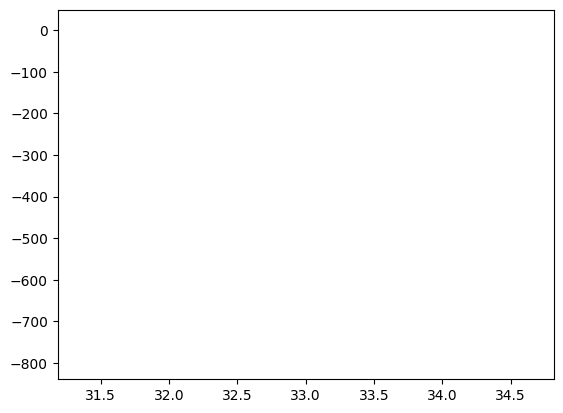

In [87]:
plt.plot(di_red_400.index, di_red_400.values, label="di_red_400", color="red")